In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
ratings = pd.read_csv('data/ratings.csv')

movies = pd.read_csv('data/movies.csv')

In [10]:
n_ratings = len(ratings)
n_movies = ratings['movieId'].nunique()
n_users = ratings['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 25000095
Number of unique movieId's: 59047
Number of unique users: 162541
Average number of ratings per user: 153.81
Average number of ratings per movie: 423.39


C:\Users\rolan\AppData\Local\Temp\ipykernel_30216\2656267757.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=ratings, palette="viridis")


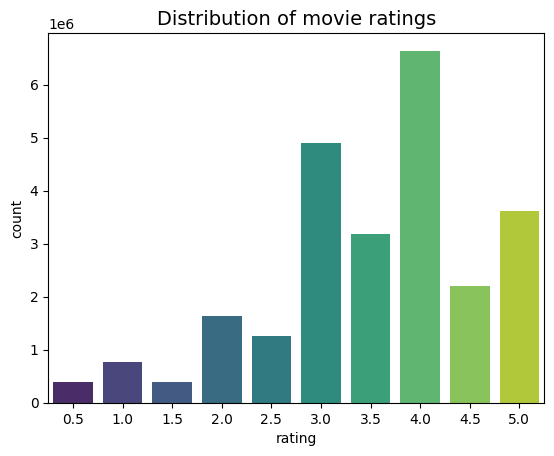

In [11]:
#What is the distribution of movie ratings
sns.countplot(x="rating", data=ratings, palette="viridis")
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

In [12]:
print(f"Mean global rating: {round(ratings['rating'].mean(),2)}.")

mean_ratings = ratings.groupby('userId')['rating'].mean()
print(f"Mean rating per user: {round(mean_ratings.mean(),2)}.")

Mean global rating: 3.53.
Mean rating per user: 3.68.


In [13]:
#Which movies are most frequently rated?
movie_ratings = ratings.merge(movies, on='movieId')
movie_ratings['title'].value_counts()[0:10]

title
Forrest Gump (1994)                          81491
Shawshank Redemption, The (1994)             81482
Pulp Fiction (1994)                          79672
Silence of the Lambs, The (1991)             74127
Matrix, The (1999)                           72674
Star Wars: Episode IV - A New Hope (1977)    68717
Jurassic Park (1993)                         64144
Schindler's List (1993)                      60411
Braveheart (1995)                            59184
Fight Club (1999)                            58773
Name: count, dtype: int64

In [14]:
#What are the lowest and highest rated movies
mean_ratings = ratings.groupby('movieId')[['rating']].mean()
lowest_rated = mean_ratings['rating'].idxmin()
movies[movies['movieId']==lowest_rated]

,movieId,title,genres
5693,5805,Besotted (2001),Drama


In [15]:
highest_rated = mean_ratings['rating'].idxmax()
movies[movies['movieId'] == highest_rated]

,movieId,title,genres
9416,27914,"Hijacking Catastrophe: 9/11, Fear & the Sellin...",Documentary


In [16]:
ratings[ratings['movieId']==highest_rated]

,userId,movieId,rating,timestamp
19328266,125475,27914,5.0,1409649085


In [17]:
#Bayesian Average
movie_stats = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])
movie_stats.head()

,count,mean
movieId,,
1,57309,3.893708
2,24228,3.251527
3,11804,3.142028
4,2523,2.853547
5,11714,3.058434


In [18]:
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()

print(f"Average number of ratings for a given movie: {C:.2f}")
print(f"Average rating for a given movie: {m:.2f}")

def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return round(bayesian_avg, 3)

Average number of ratings for a given movie: 423.39
Average rating for a given movie: 3.07


In [19]:
lamerica = pd.Series([5, 5])
bayesian_avg(lamerica)

3.08

In [20]:
#Lamerica's average Bayesian rating is 3.5
#Let's now apply bayesian_avg to all movies in our dataset
bayesian_avg_ratings = ratings.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movieId')

In [21]:
#This result makes much more sense since these movies are
#critically acclaimed films
movie_stats = movie_stats.merge(movies[['movieId', 'title']])
movie_stats.sort_values('bayesian_avg', ascending=False).head()

,movieId,count,mean,bayesian_avg,title
314,318,81482,4.413576,4.407,"Shawshank Redemption, The (1994)"
840,858,52498,4.324336,4.314,"Godfather, The (1972)"
49,50,55366,4.284353,4.275,"Usual Suspects, The (1995)"
1190,1221,34188,4.261759,4.247,"Godfather: Part II, The (1974)"
522,527,60411,4.247579,4.239,Schindler's List (1993)


In [22]:
movie_stats.sort_values('bayesian_avg', ascending=True).head()

,movieId,count,mean,bayesian_avg,title
3494,3593,4268,1.578374,1.713,Battlefield Earth (2000)
6464,6587,758,1.214380,1.880,Gigli (2003)
4669,4775,669,1.125561,1.880,Glitter (2001)
11349,50798,1180,1.457203,1.883,Epic Movie (2007)
9603,31698,633,1.232227,1.969,Son of the Mask (2005)


In [23]:
#A Glimpse at Movie Genres
movies['genres'] = movies['genres'].apply(lambda x: x.split("|"))
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [24]:
#How many movie genres are there?
from collections import Counter

genre_frequency = Counter(g for genres in movies['genres'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 20 genres.


Counter({'Drama': 25606,
         'Comedy': 16870,
         'Thriller': 8654,
         'Romance': 7719,
         'Action': 7348,
         'Horror': 5989,
         'Documentary': 5605,
         'Crime': 5319,
         '(no genres listed)': 5062,
         'Adventure': 4145,
         'Sci-Fi': 3595,
         'Children': 2935,
         'Animation': 2929,
         'Mystery': 2925,
         'Fantasy': 2731,
         'War': 1874,
         'Western': 1399,
         'Musical': 1054,
         'Film-Noir': 353,
         'IMAX': 195})

In [25]:
print("The 5 most common genres: \n", genre_frequency.most_common(5))

The 5 most common genres: 
 [('Drama', 25606), ('Comedy', 16870), ('Thriller', 8654), ('Romance', 7719), ('Action', 7348)]


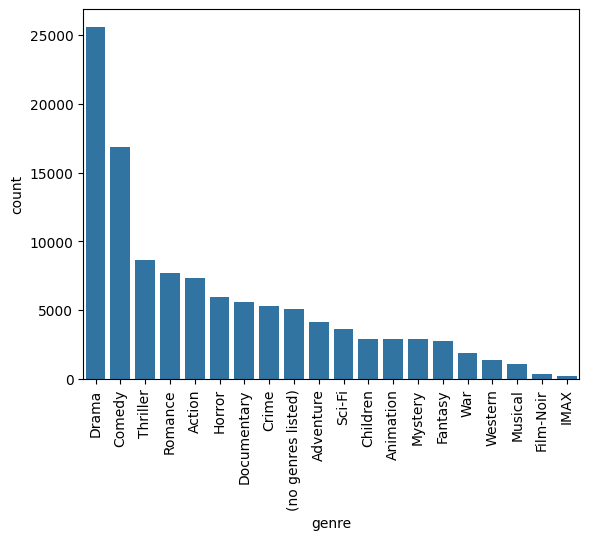

In [26]:
#Let's also visualize genres popularity with a barplot
genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']

sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Data Pre-processing
#We are going to use a technique called collaborative filtering to generate recommendations for users.
#user-item matrix, "utility" matrix.
#The beauty of collaborative filtering is that it does not require any information about the users or the movies user to generation recommendations

In [ ]:
#The create_X() function outputs a sparse matrix X with four mapper dictionaries:
#user_mapper: maps user id to user index
#movie_mapper: maps movie id to movie index
#user_inv_mapper: maps user index to user id
#movie_inv_mapper: maps movie index to movie id

In [27]:
from scipy.sparse import csr_matrix

def create_X(df):
    """
    Generates a sparse matrix from ratings dataframe.
    
    Args:
        df: pandas dataframe containing 3 columns (userId, movieId, rating)
    
    Returns:
        X: sparse matrix
        user_mapper: dict that maps user id's to user indices
        user_inv_mapper: dict that maps user indices to user id's
        movie_mapper: dict that maps movie id's to movie indices
        movie_inv_mapper: dict that maps movie indices to movie id's
    """
    M = df['userId'].nunique()
    N = df['movieId'].nunique()

    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))
    
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))
    
    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [movie_mapper[i] for i in df['movieId']]

    X = csr_matrix((df["rating"], (user_index,item_index)), shape=(M,N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(ratings)

In [28]:
X.shape

(162541, 59047)

In [ ]:
#Evaluating sparsity
#The number of stored(non-empty) elements in our matrix is equivalent to the number of ratings in our dataset

In [29]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 0.26%


In [30]:
n_ratings_per_user = X.getnnz(axis=1)
len(n_ratings_per_user)

162541

In [31]:
print(f"Most active user rated {n_ratings_per_user.max()} movies.")
print(f"Least active user rated {n_ratings_per_user.min()} movies.")

Most active user rated 32202 movies.
Least active user rated 20 movies.


In [32]:
n_ratings_per_movie = X.getnnz(axis=0)
len(n_ratings_per_movie)

59047

In [33]:
print(f"Most rated movie has {n_ratings_per_movie.max()} ratings.")
print(f"Least rated movie has {n_ratings_per_movie.min()} ratings.")

Most rated movie has 81491 ratings.
Least rated movie has 1 ratings.


C:\Users\rolan\AppData\Local\Temp\ipykernel_30216\81296992.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(n_ratings_per_user, shade=True)
C:\Users\rolan\AppData\Local\Temp\ipykernel_30216\81296992.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(n_ratings_per_movie, shade=True)


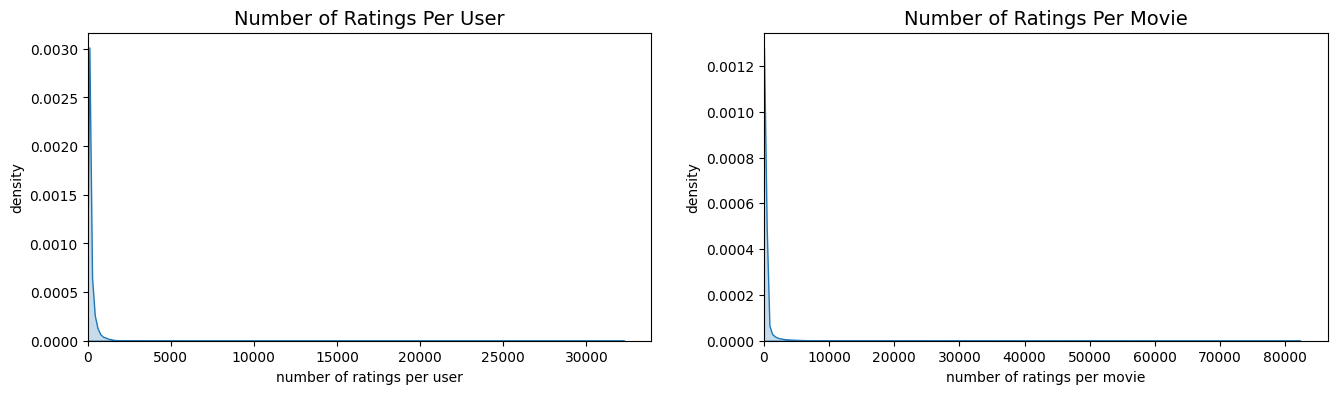

In [34]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_movie, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per Movie", fontsize=14)
plt.xlabel("number of ratings per movie")
plt.ylabel("density")
plt.show()

In [35]:
#Item-item recommendations with K-Nearest Neighbors
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    """
    Finds k-nearest neighbours for a given movie id.
    
    Args:
        movie_id: id of the movie of interest
        X: user-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for kNN calculations
    
    Output: returns list of k similar movie ID's
    """
    X = X.T
    neighbour_ids = []
    
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    # use k+1 since kNN output includes the movieId of interest
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids

In [36]:
similar_movies = find_similar_movies(1, X, movie_mapper, movie_inv_mapper, k=10)
similar_movies

[260, 3114, 1270, 356, 480, 1210, 780, 364, 588]

In [ ]:
#find_similar_movies() takes in a movieId and x matrix, and outputs a list of k movies that are similar to the movieId of interest

In [ ]:
#To make things easier we will create a dictionary that maps movieId to title

In [37]:
movie_titles = dict(zip(movies['movieId'], movies['title']))

movie_id = 1

similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, metric='cosine', k=10)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Toy Story (1995):
Star Wars: Episode IV - A New Hope (1977)
Toy Story 2 (1999)
Back to the Future (1985)
Forrest Gump (1994)
Jurassic Park (1993)
Star Wars: Episode VI - Return of the Jedi (1983)
Independence Day (a.k.a. ID4) (1996)
Lion King, The (1994)
Aladdin (1992)


In [ ]:
#Let's play around with kNN distance metric and see what results we would get if we use "manhattan" or "euclidean" instead of "cosine".

In [38]:
movie_id = 1

similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, metric='euclidean', k=10)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Toy Story (1995):
Toy Story 2 (1999)
Independence Day (a.k.a. ID4) (1996)
Willy Wonka & the Chocolate Factory (1971)
Bug's Life, A (1998)
Mission: Impossible (1996)
Aladdin (1992)
Twister (1996)
Monsters, Inc. (2001)
Men in Black (a.k.a. MIB) (1997)


In [39]:
movie_id = 1

similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, metric='manhattan', k=10)
movie_title = movie_titles[movie_id]

print(f"Because you watched {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Because you watched Toy Story (1995):
Toy Story 2 (1999)
Willy Wonka & the Chocolate Factory (1971)
Bug's Life, A (1998)
Monsters, Inc. (2001)
Mission: Impossible (1996)
Finding Nemo (2003)
Lion King, The (1994)
Men in Black (a.k.a. MIB) (1997)
Independence Day (a.k.a. ID4) (1996)


In [ ]:
#Handling the cold-start problem
#Collaborative filtering relies solely on user-item interactions within the utility matrix. The issue with this approach is that brand new users or items with no iteractions get excluded from the recommendation system. This is called the **cold start problem**. Content-based filtering is a way to handle this problem by generating recommendations based on user and item features.

#First, we need to convert the `genres` column into binary features. Each genre will have its own column in the dataframe, and will be populated with 0 or 1.

In [40]:
n_movies = movies['movieId'].nunique()
print(f"There are {n_movies} unique movies in our movies dataset.")

There are 62423 unique movies in our movies dataset.


In [41]:
genres = set(g for G in movies['genres'] for g in G)

for g in genres:
    movies[g] = movies.genres.transform(lambda x: int(g in x))
    
movie_genres = movies.drop(columns=['movieId', 'title','genres'])

In [42]:
movie_genres.head()

,Action,Documentary,Children,Mystery,Thriller,Sci-Fi,Animation,(no genres listed),Romance,Drama,War,Horror,Fantasy,Comedy,Film-Noir,IMAX,Adventure,Musical,Crime,Western
0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [43]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(movie_genres, movie_genres)
print(f"Dimensions of our genres cosine similarity matrix: {cosine_sim.shape}")

Dimensions of our genres cosine similarity matrix: (62423, 62423)


In [ ]:
#as expected after passing movie_genres dataframe into the cosine_similarity() function, we get a cosine similarity matrix of shape(n_movies, n_movies)

In [44]:
#Creating a movie finder function
from fuzzywuzzy import process

def movie_finder(title):
    all_titles = movies['title'].tolist()
    closest_match = process.extractOne(title, all_titles)
    return closest_match[0]

#example
title_movie = movie_finder('Wall street')
title_movie

C:\Users\rolan\Desktop\4.class\Bitirme odevi\recommendation_movie\venv\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


'Wolf (1994)'

In [46]:
title_movie = movie_finder('juminji')
title_movie

'Jumanji (1995)'

In [47]:
movie_idx = dict(zip(movies['title'], list(movies.index)))
idx = movie_idx[title_movie]
print(f"Movie index for Jumanji: {idx}")

Movie index for Jumanji: 1


In [48]:
n_recommendations=10
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:(n_recommendations+1)]
similar_movies = [i[0] for i in sim_scores]

In [49]:
print(f"Because you watched {title_movie}:")
movies['title'].iloc[similar_movies]

Because you watched Jumanji (1995):


59                     Indian in the Cupboard, The (1995)
124                     NeverEnding Story III, The (1994)
986                       Escape to Witch Mountain (1975)
1954            Darby O'Gill and the Little People (1959)
2003                                  Return to Oz (1985)
2071                        NeverEnding Story, The (1984)
2072    NeverEnding Story II: The Next Chapter, The (1...
2308                        Santa Claus: The Movie (1985)
4790    Harry Potter and the Sorcerer's Stone (a.k.a. ...
9557                            Magic in the Water (1995)
Name: title, dtype: object

In [50]:
#recommender function
def get_content_based_recommendations(title_string, n_recommendations=10):
    title = movie_finder(title_string)
    idx = movie_idx[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:(n_recommendations+1)]
    similar_movies = [i[0] for i in sim_scores]
    print(f"Because you watched {title}:")
    print(movies['title'].iloc[similar_movies])

In [51]:
get_content_based_recommendations('toy story', 5)

Because you watched Toy Story (1995):
2203                                       Antz (1998)
3021                                Toy Story 2 (1999)
3653    Adventures of Rocky and Bullwinkle, The (2000)
3912                  Emperor's New Groove, The (2000)
4780                             Monsters, Inc. (2001)
Name: title, dtype: object


In [56]:
X.shape

(162541, 59047)